In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
from matplotlib.pyplot import figure
import matplotlib.pyplot as plt
import os
from collections import Counter
import re

In [2]:
!pip install emoji
import emoji

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 197 kB 5.1 MB/s 
  Created wheel for emoji: filename=emoji-2.0.0-py3-none-any.whl size=193022 sha256=030b4d0298ee63be4e11f25a314dbc5f9cae3334bc105802d04db9cde727aa34
  Stored in directory: /root/.cache/pip/wheels/ec/29/4d/3cfe7452ac7d8d83b1930f8a6205c3c9649b24e80f9029fc38
Successfully built emoji


In [3]:
from google.colab import drive
drive.mount('/content/drive/')

Drive already mounted at /content/drive/; to attempt to forcibly remount, call drive.mount("/content/drive/", force_remount=True).


In [4]:
os.chdir("drive/MyDrive/TextAnalytics - AMI 2020/dataset/")

In [5]:
ami_csv = "AMI2020_training_raw_anon.tsv"

df = pd.read_csv(ami_csv, sep='\t')

In [6]:
ami_test= "AMI2020_test_raw_gold_anon.tsv"

test = pd.read_csv(ami_test, sep='\t')

In [ ]:
df.shape

(4409, 4)

In [ ]:
test.shape

(1000, 4)

In [7]:
pd.set_option("display.max_colwidth", None)

In [8]:
df = df.drop(columns="id")

In [ ]:
df.loc[df["misogynous"]==1].sample(10)

,text,misogynous,aggressiveness
1120,NICKI CULONA SVELA STA SORPRESA E FALLA FINITA OK,1,1
332,culona credo in te quindi ti prego non farmi passare per povero coglione che sta aspettando con tanta ansia della musica scadente ok,1,1
1028,"<MENTION_1> <MENTION_2> <MENTION_3> <MENTION_4> esatto vuole stare in europa ma non come suddito .della culona teutonica o del renzi ( sic !) francese ,hai capito capra .capra .capra.capra",1,1
1129,RT <MENTION_1> Gabriella moglie tettona infedele cerca un nuovo trombamico Gabriella &gt;&gt; <URL> <URL>,1,0
26,<MENTION_1> Non sparire però :) tettona bella,1,0
127,<MENTION_1> Che bel culone ???,1,1
1476,<MENTION_1> Viva la figa di legno ❤,1,0
4276,<MENTION_1> abominevole chiattona <MENTION_2>,1,1
1322,<MENTION_1> Tettona mia bellissima,1,0
956,<MENTION_1> <MENTION_2> <MENTION_3> <MENTION_4> <MENTION_5> <MENTION_6> <MENTION_7> <MENTION_8> <MENTION_9> <MENTION_10> <MENTION_11> <MENTION_12> <MENTION_13> <MENTION_14> <MENTION_15> <MENTION_16> <MENTION_17> <MENTION_18> <MENTION_19> <MENTION_20>,1,0


In [ ]:
df.loc[df["aggressiveness"]==1].sample(10)

,text,misogynous,aggressiveness
1389,<MENTION_1> <MENTION_2> SBoldrini a casa a fa i panni e pulizie di Pasqua,1,1
4214,<MENTION_1> Che gnoccona e cagna che sei amore mi. Piaci sempre di piu,1,1
738,<MENTION_1> a prepararti il tuo bel culone a essere sfondata??! ??,1,1
969,<MENTION_1> ormai oer me tu sei la tettona,1,1
1016,"<MENTION_1> Bravissima, pompinara twitter",1,1
925,grande cavalcata di questa tettona!!!! <URL>,1,1
1470,<MENTION_1> Hummmm che bella pompinara. ..spero che non sprechi neanche una goccia. ...???,1,1
790,#uominiedonne DONATELLA.: er puttanone!,1,1
33,"#Selvaggilucarelli non sa recitare, non sa ballare, non sa presentare, diciamo che non sa fare nulla e l'unico motivo per cui si trova in tv è perchè è un puttanone che l'ha data a mezzo mondo...",1,1
449,<MENTION_1> Wow fantastica gran puttanona mmmmmm,1,1


In [ ]:
df.loc[df["misogynous"]==0].sample(10)

,text,misogynous,aggressiveness
1814,"ma che porcodio stai dicendo coglione!impara il senso delle parole deficiente di una testa di cazzo.solo perché non ti piace la Juventus non devi offendere me e nemmeno la mia famiglia, ma che cazzo hai nella testa? imbecille <URL>",0,0
3437,<MENTION_1> <MENTION_2> <MENTION_3> <MENTION_4> <MENTION_5> <MENTION_6> <MENTION_7> <MENTION_8> <MENTION_9> Sono d'accordo. Infatti è da stamattina che scrivo che mi sono rotto il cazzo. Ormai pare che il campo non esista più porca puttana,0,0
2088,"stress, perché porca puttana mi muoiono tutti. <URL>",0,0
2104,HO UN ESAME ORALE TRA POCHI MINUTI PORCA PUTTANA VACCA IMPANATA,0,0
2757,Sono al cinema a guardare Ragù Player One E PORCA PUTTANA QUANTO È BELLO.,0,0
2283,Tagliamerda è in forma oggi. Porca puttana. 3 partite lo mandano ad arbitrare 2 volte... tutto casuale.,0,0
3131,"Sto leggendo quel libro in cui Philip Roth parla sempre di cazzi, palle, sperma, figa, mestruo e di quanto odia la sua famiglia <URL>",0,0
2150,"<MENTION_1> Esatto. Hai ragione.(Non so bene cosa si intenda per figa di legno"", ma ogni possibile definizione negativa non potrebbe mai caratterizzarti. Fidati ;-) )""",0,0
2780,Porca puttana tuitto per una settimana come se non ci fosse un domani #juventusfootballclub,0,0
3480,"tranquille ragazze, tranquilli gay, il Butturini c'ha una morosa che è un pezzo di figa mostruosa! #TVOI",0,0


In [9]:
def target_label (row):
  if ((row["aggressiveness"] == 1) & (row["misogynous"] == 1)):
    return "Aggressive Misogynous"
  if ((row["aggressiveness"] == 0) & (row["misogynous"] == 1)):
    return "Non Aggressive Misogynous"
  else:
    return "Non Misogynous" 

In [10]:
df['target'] = df.apply(lambda row: target_label(row), axis=1)

In [11]:
size = len(df[df["misogynous"] == 1])
print("Number of misogynous tweets = " +  str(size))
print("Percertage of misogynous tweets = " + str(round((size/len(df) * 100),2)))
print("\t")
size = len(df[df["misogynous"] == 0])
print("Number of non misogynous tweets = " +  str(size))
print("Percertage of non misogynous tweets = " + str(round((size/len(df) * 100),2)))

Number of misogynous tweets = 2047
Percertage of misogynous tweets = 46.43
	
Number of non misogynous tweets = 2362
Percertage of non misogynous tweets = 53.57


In [12]:
size = len(df[df["aggressiveness"] == 1])
print("Number of aggressive tweets = " +  str(size))
print("Percertage of aggressive tweets = " + str(round((size/len(df) * 100),2)))
print("\t")
size = len(df[df["aggressiveness"] == 0])
print("Number of non aggressive tweets = " +  str(size))
print("Percertage of non aggressive tweets = " + str(round((size/len(df) * 100),2)))

print("\t")
print("\t")

mys_df = df[df['misogynous']==1]

size = len(mys_df[mys_df["aggressiveness"] == 1])
print("Number of aggressive tweets over mysogynous ones= " +  str(size))
print("Percertage of aggressive tweets over mysogynous ones= " + str(round((size/len(mys_df) * 100),2)))
print("\t")
size = len(mys_df[mys_df["aggressiveness"] == 0])
print("Number of non aggressive tweets over mysogynous ones = " +  str(size))
print("Percertage of non aggressive tweets over mysogynous ones = " + str(round((size/len(mys_df) * 100),2)))

Number of aggressive tweets = 1569
Percertage of aggressive tweets = 35.59
	
Number of non aggressive tweets = 2840
Percertage of non aggressive tweets = 64.41
	
	
Number of aggressive tweets over mysogynous ones= 1569
Percertage of aggressive tweets over mysogynous ones= 76.65
	
Number of non aggressive tweets over mysogynous ones = 478
Percertage of non aggressive tweets over mysogynous ones = 23.35


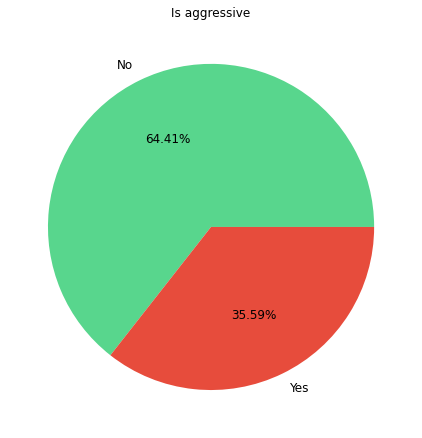

In [ ]:
fig, ax = plt.subplots(figsize=(7.5, 7.5))
myexplode = [0.1, 0]
mycolors = ["#58D68D", "#E74C3C"]
cnt = df["aggressiveness"].value_counts()
cnt.plot(kind="pie",colors=mycolors,
    labels=["No", "Yes"],
    autopct='%1.2f%%', fontsize=12, title = "Is aggressive", ax=ax)
ax.set_ylabel(None)
plt.show()

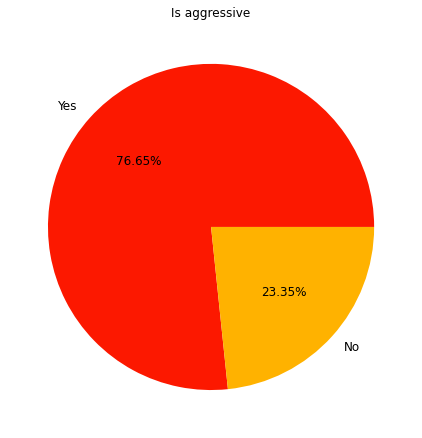

In [ ]:
fig, ax = plt.subplots(figsize=(7.5, 7.5))
myexplode = [0.1, 0]
mycolors = ["#FC1800", "#FFB200"]
cnt = mys_df["aggressiveness"].value_counts()
cnt.plot(kind="pie",colors=mycolors,
    labels=["Yes", "No"],
    autopct='%1.2f%%', fontsize=12, title = "Is aggressive", ax=ax)
ax.set_ylabel(None)
plt.show()

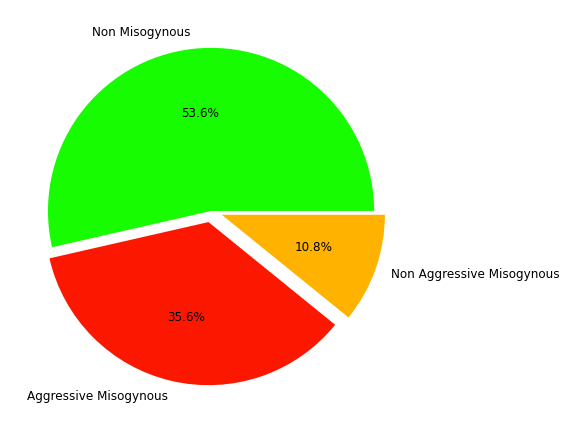

In [34]:
fig, ax = plt.subplots(figsize=(7.5, 7.5))
mycolors = ["#17FC00", "#FC1800","#FFB200"]
cnt = df["target"].value_counts()
cnt.plot(kind="pie",colors=mycolors,
    labels=["Non Misogynous", "Aggressive Misogynous", "Non Aggressive Misogynous"],
     explode = [0,0.07,0.07],
    autopct='%1.1f%%', fontsize=12, ax=ax)
ax.set_ylabel(None)
plt.show()

([<matplotlib.axis.XTick at 0x7f5e47725a90>,
 [Text(0, 0, 'Non Misogynous'), Text(0, 0, 'Misogynous')])

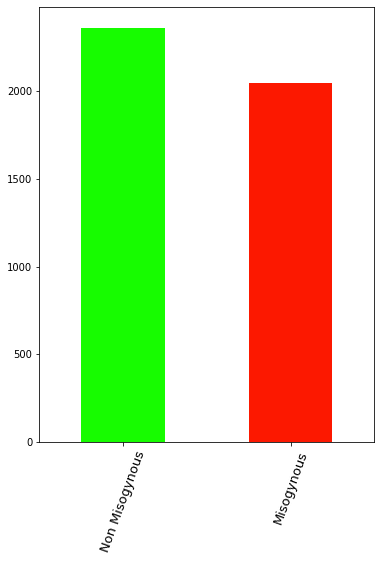

In [22]:
counts = df["misogynous"].value_counts()
counts.plot(kind = "bar",figsize=(6,8), color =["#17FC00", "#FC1800"])
labels=["Non Misogynous", "Misogynous"]
x_pos = np.arange(len(labels))
plt.xticks(x_pos,labels,rotation=70, fontsize=13)

([<matplotlib.axis.XTick at 0x7f5e46a1c690>,
 [Text(0, 0, 'Non Aggressiveness'), Text(0, 0, 'Aggressiveness')])

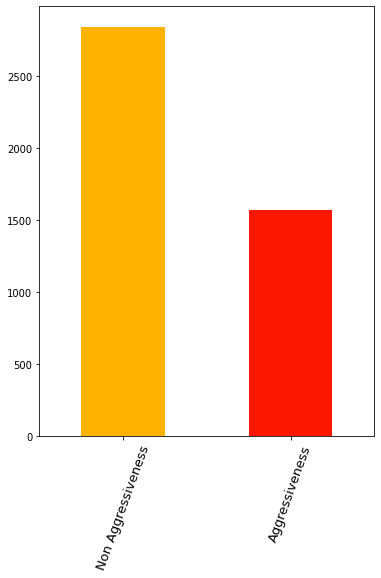

In [28]:
counts = df["aggressiveness"].value_counts()
counts.plot(kind = "bar",figsize=(6,7.9), color =["#FFB200", "#FC1800"])
labels=["Non Aggressiveness", "Aggressiveness"]
x_pos = np.arange(len(labels))
plt.xticks(x_pos,labels,rotation=70, fontsize=13)

In [ ]:
df['char_len'] = df['text'].apply(lambda x: len(x))
df['word_len'] = df['text'].apply(lambda x: len(x.split()))

In [ ]:
df['word_len'].describe()

count    4409.000000
mean       20.524382
std        44.912341
min         1.000000
25%         8.000000
50%        14.000000
75%        24.000000
max      1300.000000
Name: word_len, dtype: float64

In [ ]:
df['char_len'].describe()

count    4409.000000
mean      124.600590
std       256.755658
min         6.000000
25%        52.000000
50%        87.000000
75%       145.000000
max      7223.000000
Name: char_len, dtype: float64

In [ ]:
df.groupby(['target'])["word_len"].mean()

target
Aggressive Misogynous        17.056087
Non Aggressive Misogynous    16.152720
Non Misogynous               23.712955
Name: word_len, dtype: float64

In [ ]:
text_naggr = df["text"].loc[df['target']=="Non Aggressive Misogynous"].tolist()
text_aggr = df["text"].loc[df['target']=="Aggressive Misogynous"].tolist()
text_nm = df["text"].loc[df['target']=="Non Misogynous"].tolist()

text_m1 = df["text"].loc[df['misogynous']==1].tolist()
text_m0 = df["text"].loc[df['misogynous']==0].tolist()

In [ ]:
hash_counts_aggr = Counter(re.findall(r'#([a-z0-9]+)', ' '.join(text_aggr), re.I))
print("Most common hashtag in aggressive tweets: " + str(hash_counts_aggr.most_common(5)))

hash_counts_naggr = Counter(re.findall(r'#([a-z0-9]+)', ' '.join(text_naggr), re.I))
print("Most common hashtag in non aggressive tweets: " + str(hash_counts_naggr.most_common(5)))

hash_counts_nm = Counter(re.findall(r'#([a-z0-9]+)', ' '.join(text_nm), re.I))
print("Most common hashtag in non mys tweets: " + str(hash_counts_nm.most_common(5)))

Most common hashtag in aggressive tweets: [('GF15', 24), ('isola', 7), ('chilhavisto', 6), ('gf15', 6), ('culona', 5)]
Most common hashtag in non aggressive tweets: [('GF15', 6), ('uominiedonne', 3), ('BallandoConLeStelle', 3), ('SelvaggiaLucarelli', 2), ('primoappuntamento', 2)]
Most common hashtag in non mys tweets: [('Amici17', 24), ('JuveReal', 11), ('amici17', 11), ('Milan', 9), ('TorinoInter', 9)]


In [ ]:
c_aggr = 0
c_naggr = 0
c_nm = 0
for t in text_aggr:
  if (len(re.findall(r'#([a-z0-9]+)',t))>=1):
    c_aggr = c_aggr + 1

for t in text_naggr:
  if (len(re.findall(r'#([a-z0-9]+)',t))>=1):
    c_naggr = c_naggr + 1

for t in text_nm:
  if (len(re.findall(r'#([a-z0-9]+)',t))>=1):
    c_nm = c_nm + 1

print("Percentage of hashtag in Aggressive Tweets: " + str(round(c_aggr/len(text_aggr)*100,2)) )
print("Percentage of hashtag in Non Aggressive Tweets: " + str(round(c_naggr/len(text_naggr)*100,2)) )
print("Percentage of hashtag in Non mys Tweets: " + str(round(c_nm/len(text_nm)*100,2)) )

Percentage of hashtag in Aggressive Tweets: 5.16
Percentage of hashtag in Non Aggressive Tweets: 4.81
Percentage of hashtag in Non mys Tweets: 6.35


In [ ]:
c_aggr = 0
c_naggr = 0
c_nm = 0
c_m0 = 0
c_m1 = 0
for t in text_aggr:
  if (len(re.findall(r'\b[A-Z]{2,}\b',t))>=1):
    c_aggr = c_aggr + 1

for t in text_naggr:
  if (len(re.findall(r'\b[A-Z]{2,}\b',t))>=1):
    c_naggr = c_naggr + 1

for t in text_nm:
  if (len(re.findall(r'\b[A-Z]{2,}\b',t))>=1):
    c_nm = c_nm + 1

for t in text_m1:
  if (len(re.findall(r'\b[A-Z]{2,}\b',t))>=1):
    c_m1 = c_m1 + 1

for t in text_m0:
  if (len(re.findall(r'\b[A-Z]{2,}\b',t))>=1):
    c_m0 = c_m0 + 1


print("Percentage of Upper case words in Aggressive Tweets: " + str(round(c_aggr/len(text_aggr)*100,2)) )
print("Percentage of Upper case words in Mys Tweets: " + str(round(c_naggr/len(text_naggr)*100,2)) )
print("Percentage of Upper case words in Non Mys Tweets: " + str(round(c_nm/len(text_nm)*100,2)) )

print("Percentage of Upper case words in Mys Tweets: " + str(round(c_m1/len(text_m1)*100,2)) )
print("Percentage of Upper case words in Non Mys Tweets: " + str(round(c_m0/len(text_m0)*100,2)) )

Percentage of Upper case words in Aggressive Tweets: 26.26
Percentage of Upper case words in Mys Tweets: 19.46
Percentage of Upper case words in Non Mys Tweets: 39.2
Percentage of Upper case words in Mys Tweets: 24.67
Percentage of Upper case words in Non Mys Tweets: 39.2


In [ ]:
c_aggr = 0
c_naggr = 0
c_nm = 0
for t in text_aggr:
  if (len(re.findall(r'[?\!]+$',t))>=1):
    c_aggr = c_aggr + 1

for t in text_naggr:
  if (len(re.findall(r'[?\!]+$',t))>=1):
    c_naggr = c_naggr + 1

for t in text_nm:
  if (len(re.findall(r'[?\!]+$',t))>=1):
    c_nm = c_nm + 1

print("Percentage of words that ends with puntuaction case words in Aggressive Tweets: " + str(round(c_aggr/len(text_aggr)*100,2)) )
print("Percentage of words that ends with puntuaction in Mys Tweets: " + str(round(c_naggr/len(text_naggr)*100,2)) )
print("Percentage of words that ends with puntuaction in Non Mys Tweets: " + str(round(c_nm/len(text_nm)*100,2)) )

Percentage of words that ends with puntuaction case words in Aggressive Tweets: 14.53
Percentage of words that ends with puntuaction in Mys Tweets: 17.36
Percentage of words that ends with puntuaction in Non Mys Tweets: 10.16


In [ ]:
c_aggr = 0
c_naggr = 0
c_nm = 0
for t in text_aggr:
  if (len(re.findall(r'MENTION',t))>=1):
    c_aggr = c_aggr + 1

for t in text_naggr:
  if (len(re.findall(r'MENTION',t))>=1):
    c_naggr = c_naggr + 1

for t in text_nm:
  if (len(re.findall(r'MENTION',t))>=1):
    c_nm = c_nm + 1
print("Percentage of words with mention in Aggressive Tweets: " + str(round(c_aggr/len(text_aggr)*100,2)) )
print("Percentage of words with mention in Mys Tweets: " + str(round(c_naggr/len(text_naggr)*100,2)) )
print("Percentage of words wth mention in Non Mys Tweets: " + str(round(c_nm/len(text_nm)*100,2)) )

Percentage of words with mention in Aggressive Tweets: 71.45
Percentage of words with mention in Mys Tweets: 73.43
Percentage of words wth mention in Non Mys Tweets: 34.42


In [ ]:
c_aggr = 0
c_naggr = 0
c_nm = 0
for t in text_aggr:
  if (len(re.findall(r":+[';()-/|DPXp]\S*|;+['()-/|DPXp]\S*",t))>=1):
    c_aggr = c_aggr + 1

for t in text_naggr:
  if (len(re.findall(r":+[';()-/|DPXp]\S*|;+['()-/|DPXp]\S*",t))>=1):
    c_naggr = c_naggr + 1

for t in text_nm:
  if (len(re.findall(r":+[';()-/|DPXp]\S*|;+['()-/|DPXp]\S*",t))>=1):
    c_nm = c_nm + 1
print("Percentage of words with emoticons in Aggressive Tweets: " + str(round(c_aggr/len(text_aggr)*100,2)) )
print("Percentage of words with emoticons in Mys Tweets: " + str(round(c_naggr/len(text_naggr)*100,2)) )
print("Percentage of words wth emoticons in Non Mys Tweets: " + str(round(c_nm/len(text_nm)*100,2)) )


Percentage of words with emoticons in Aggressive Tweets: 0.25
Percentage of words with emoticons in Mys Tweets: 1.26
Percentage of words wth emoticons in Non Mys Tweets: 0.8


In [ ]:
c_aggr = 0
c_naggr = 0
c_nm = 0
for t in text_aggr:
  if (len(re.findall(r'[0-9]+',t))>=1):
    c_aggr = c_aggr + 1

for t in text_naggr:
  if (len(re.findall(r'[0-9]+',t))>=1):
    c_naggr = c_naggr + 1

for t in text_nm:
  if (len(re.findall(r'[0-9]+',t))>=1):
    c_nm = c_nm + 1
print("Percentage of numbers in Aggressive Tweets: " + str(round(c_aggr/len(text_aggr)*100,2)) )
print("Percentage of numbers in Mys Tweets: " + str(round(c_naggr/len(text_naggr)*100,2)) )
print("Percentage of numbers in Non Mys Tweets: " + str(round(c_nm/len(text_nm)*100,2)) )


Percentage of words with emoticons in Aggressive Tweets: 75.14
Percentage of words with emoticons in Mys Tweets: 78.45
Percentage of words wth emoticons in Non Mys Tweets: 44.45


In [ ]:
c_aggr = 0
c_naggr = 0
c_nm = 0
for t in text_aggr:
  if (len(re.findall(r"[\.\,\!\?\:\;\-\=]",t))>=1):
    c_aggr = c_aggr + 1

for t in text_naggr:
  if (len(re.findall(r"[\.\,\!\?\:\;\-\=]",t))>=1):
    c_naggr = c_naggr + 1

for t in text_nm:
  if (len(re.findall(r"[\.\,\!\?\:\;\-\=]",t))>=1):
    c_nm = c_nm + 1
print("Percentage of puntuations in Aggressive Tweets: " + str(round(c_aggr/len(text_aggr)*100,2)) )
print("Percentage of puntuations in Mys Tweets: " + str(round(c_naggr/len(text_naggr)*100,2)) )
print("Percentage of puntuations in Non Mys Tweets: " + str(round(c_nm/len(text_nm)*100,2)) )

Percentage of puntuations in Aggressive Tweets: 54.11
Percentage of puntuations in Mys Tweets: 60.67
Percentage of puntuations in Non Mys Tweets: 64.99


In [ ]:
c_aggr = 0
c_naggr = 0
c_nm = 0
for t in text_aggr:
  if (len(re.findall(r"@",t))>=1):
    c_aggr = c_aggr + 1

for t in text_naggr:
  if (len(re.findall(r"@",t))>=1):
    c_naggr = c_naggr + 1

for t in text_nm:
  if (len(re.findall(r"@",t))>=1):
    c_nm = c_nm + 1
print("Percentage of mention in Aggressive Tweets: " + str(round(c_aggr/len(text_aggr)*100,2)) )
print("Percentage of mention in Mys Tweets: " + str(round(c_naggr/len(text_naggr)*100,2)) )
print("Percentage of mention in Non Mys Tweets: " + str(round(c_nm/len(text_nm)*100,2)) )

Percentage of mention in Aggressive Tweets: 0.06
Percentage of mention in Mys Tweets: 0.21
Percentage of mention in Non Mys Tweets: 0.51


In [ ]:
import string

punct_to_remove = string.punctuation.replace("@", "")
punct_to_remove = punct_to_remove.replace("<", "")
punct_to_remove = punct_to_remove.replace(">", "")

In [ ]:
punct_to_remove

'!"#$%&\'()*+,-./:;=?[\\]^_`{|}~'

In [ ]:
def remove_adjacent_dup_words(text):
    old_text = text.split()
    new_text = []
    last_word = None
    for crn_word in old_text:
        if crn_word != last_word:
            new_text.append(crn_word)
            last_word = crn_word
    to_string = ' '.join(new_text)
    return to_string

In [ ]:
def remove_consecutive_same_vowels(text):
  old_text = text.split()
  new_text = []
  for crn_word in old_text:
    new_word = re.compile('aa+').sub('a',crn_word)
    new_word = re.compile('ee+').sub('e',new_word)
    new_word = re.compile('ii+').sub('i',new_word)
    new_word = re.compile('oo+').sub('o',new_word)
    new_word = re.compile('uu+').sub('u',new_word)
    new_text.append(new_word)
  to_string = ' '.join(new_text)
  return to_string

In [ ]:
def remove_rt(text):
  old_text = text.split()
  if "rt" in old_text:
    old_text.remove("rt")
  to_string = ' '.join(old_text)
  return to_string

In [ ]:
def cleaning_text(text):
  # lower case 
  new_text = text.lower()
  # remove re-tweet (RT), as they add little information
  new_text = remove_rt(new_text)
  # replace ? and ! at the end of the text, often used to put emphasis
  new_text= re.sub("[!\?]+$", " <puntuaction>", new_text)
  # replace all other puntuaction in the text with with white space
  new_text = re.sub(r'[]!"$%&\'()*+,./:;=?#[\\^`{|}~-]+“”', ' ', new_text)
  # replace # in hashtag with white space, keep the name as it can be significant
  new_text = re.sub("#", ' ', new_text)
  # replace links
  new_text = re.sub(r'(https|http)?:\/\/(\w|\.|\-|\/|\=|\&|\%)*\b', ' ',new_text)
  new_text = re.sub(r'(www)(\w|\.|\-|\/|•|\=|\&|\%|\xa0|gt|”)*\b', ' ', new_text)
  # replace unicode emoji with white space
  new_text = emoji.replace_emoji(new_text,replace=' ')
  # replace any other emojis 
  new_text = re.sub(":+[';()-/|DPXp]\S*|;+['()-/|DPXp]\S*", ' ', new_text)
  # replace unknown characters
  new_text = re.sub("&lt;3", ' ', new_text)
  # replace numbers in mention with white space
  new_text = re.sub("_[0-9]+", '', new_text)
  # replace numbers in text with <number>
  new_text = re.sub("[0-9]+", " <number>", new_text)
  # replace double spaces
  new_text = re.sub('\s{2,}', ' ', new_text)
  # replace user tag with mention, like the others in the texts
  new_text = re.sub("@\S+", "<mention>", new_text)
  # remove consecutive duplicate words, such as duplicate mention (e.g. <mention> <mention>)
  new_text = remove_adjacent_dup_words(new_text)
  # remove consecutive same vowels (e.g. ciaoneeeeee ---> ciaone)
  new_text = remove_consecutive_same_vowels(new_text)
  return new_text

In [ ]:
df_old = df.copy()
df = df_old.copy()

In [ ]:
df['text'] = df.apply(lambda row: cleaning_text(row["text"]), axis=1)

In [ ]:
df['text'] = df.apply(lambda row: remove_rt(row["text"]), axis=1)

In [ ]:
text_naggr = df["text"].loc[df['target']=="Non Aggressive Misogynous"].tolist()
text_aggr = df["text"].loc[df['target']=="Aggressive Misogynous"].tolist()
text_nm = df["text"].loc[df['target']=="Non Misogynous"].tolist()

In [ ]:
text_naggr

['<mention> salvo poi mandare la culona a mosca aummaumm per farsi dare da putin commesse multimiliardarie e metterlo in quel posto ai fratelli della ue tra i quali noi',
 '<mention> ah tettona',
 '<mention> hai visto suoi stories la tettona',
 'tremenda culona rica <mention> <url>',
 '<mention> che tettona <puntuaction>',
 '<mention> non sparire però tettona bella',
 'non ho voglia di lasciare il mio lago x farmi <number> ore fino a malpensa x la mia tettona che palle',
 'qualsiasi cosa possa aver fatto o detto raoulbova selvaggialucarelli <mention> si propone sempre per quello che è una maleducata villana acida pronta a attaccare tutto e tutti per fare show <mention> da lei ricava solo una brutta pubblicità peccato <url>',
 '<mention> ma basta co sta dieta metti su un po di bel culone che magari ti guardano di più tu che ti lamenti sempre che non trovi da ciulare ai maschi piace palpare',
 '<mention> splendida pompinara sborro',
 'se vai a nanna sereno è meglio buonanotte da quella c

In [ ]:
for t in text_nm:
  w = t.split()
  for l in w:
    if (l == 'bellissima'):
      print("new")
      print(t)

new
ma porco dio state tutto il giorno a fotografarvi i tettoni poi appena uno si permette di dire dio cane che bocce gli date del ritardato allora invece di fare le troie su twitter scrivete dei libri se volete essere considerate in altro modo finchè farete le puttane <url> <number> <mention> ti sbatterei come una cagna <number> ue raga io sono un’egoista del cazzo manui è psicopatica giulia è nana e irritante ah no lo è davvero silvia si mangia i conigli simo è una rompi cazzo mattia è una puttana che ci prova con tutti eccquesto è il team kai salve <number> <mention> ue raga io sono un’egoista del cazzo manui è psicopatica giulia è nana e irritante ah no lo è davvero silvia si mangi… <number> <mention> si lascia usare senza problemi cagna che sei <mention> <url> <number> <mention> apri bene le gambe lurida troia <url> <number> <mention> mi bella culona <number> <mention> sei una cagna ninfomame <url> <number> <mention> che faccia da troia <number> non c’e tempo pi le puttane false c